In [2]:
import torch
from utils import *
from PIL import Image
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Model checkpoints
#srgan_checkpoint = "./checkpoint_srgan.pth.tar"
# srresnet_checkpoint = "./checkpoint_1.tar"

# # Load models
# srresnet = torch.load(srresnet_checkpoint).to(device)
# srresnet.eval()
#srgan_generator = torch.load(srgan_checkpoint)['generator'].to(device)
#srgan_generator.eval()

# Assuming convert_image is defined elsewhere and works as expected.
# Assuming srresnet is a defined and loaded model.

def visualize_sr(img, srresnet_eval, halve=False):
    """
    Visualizes the super-resolved images from the SRResNet and SRGAN for comparison with the bicubic-upsampled image
    and the original high-resolution (HR) image, as done in the paper.

    :param img: filepath of the HR image
    :param srresnet_eval: SRResNet model in evaluation mode
    :param halve: halve each dimension of the HR image to make sure it's not greater than the dimensions of your screen?
                  For instance, for a 2160p HR image, the LR image will be of 540p (1080p/4) resolution. On a 1080p screen,
                  you will therefore be looking at a comparison between a 540p LR image and a 1080p SR/HR image because
                  your 1080p screen can only display the 2160p SR/HR image at a downsampled 1080p. This is only an
                  APPARENT rescaling of 2x.
                  If you want to reduce HR resolution by a different extent, modify accordingly.
    """
    # Load image, downsample to obtain low-res version
    hr_img = Image.open(img).convert('RGB')
    if halve:
        hr_img = hr_img.resize((hr_img.width // 2, hr_img.height // 2), Image.LANCZOS)
    lr_img = hr_img.resize((hr_img.width // 4, hr_img.height // 4), Image.BICUBIC)

    # Bicubic Upsampling
    bicubic_img = lr_img.resize((hr_img.width, hr_img.height), Image.BICUBIC)

    # Super-resolution (SR) with SRResNet
    sr_img_srresnet = srresnet(convert_image(hr_img, source='pil', target='imagenet-norm').unsqueeze(0).to(device))
    sr_img_srresnet = sr_img_srresnet.squeeze(0).cpu().detach()
    sr_img_srresnet = convert_image(sr_img_srresnet, source='[-1, 1]', target='pil')

    # Super-resolution (SR) with SRGAN - Uncomment if SRGAN model is available
    # sr_img_srgan_tensor = srgan_generator(ToTensor()(lr_img).unsqueeze(0).to(device))
    # sr_img_srgan = ToPILImage()(sr_img_srgan_tensor.squeeze().cpu())

    # Plotting
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle('Super-Resolution Comparison', fontsize=16)


    axs[0].imshow(hr_img)
    axs[0].set_title('Original')
    axs[0].axis('off')
    
    axs[1].imshow(sr_img_srresnet)
    axs[1].set_title('SRResNet')
    axs[1].axis('off')

    

    # Uncomment if SRGAN model is available
    # fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    # fig.suptitle('Super-Resolution Comparison', fontsize=16)
    #
    # axs[0, 0].imshow(bicubic_img)
    # axs[0, 0].set_title('Bicubic')
    # axs[0, 0].axis('off')
    #
    # axs[0, 1].imshow(sr_img_srresnet)
    # axs[0, 1].set_title('SRResNet')
    # axs[0, 1].axis('off')
    #
    # axs[1, 0].imshow(sr_img_srgan)
    # axs[1, 0].set_title('SRGAN')
    # axs[1, 0].axis('off')
    #
    # axs[1, 1].imshow(hr_img)
    # axs[1, 1].set_title('Original HR')
    # axs[1, 1].axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
# srresnet_eval = ... # load your model here
# visualize_sr('path_to_image.jpg', srresnet_eval)


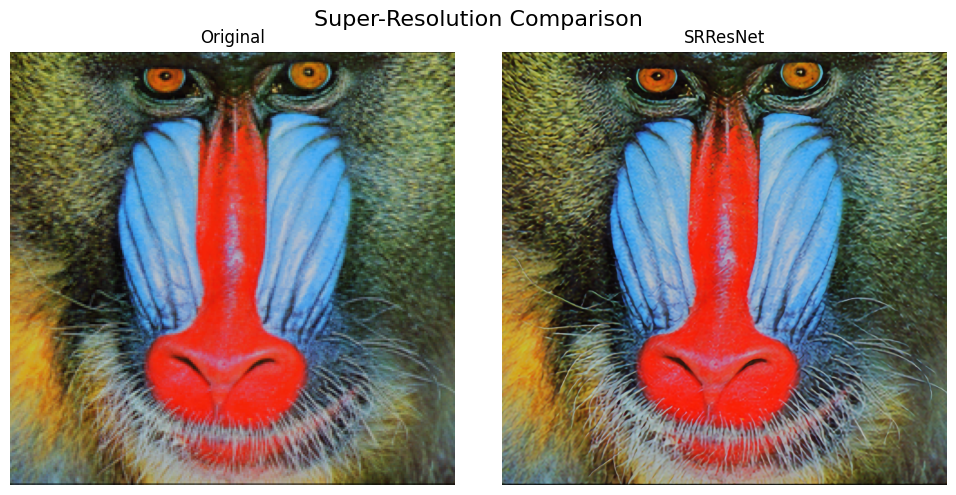

In [8]:
srresnet_checkpoint = "./checkpoints/checkpoint_srresnet_32_.pth.tar"

# Load models
srresnet = torch.load(srresnet_checkpoint)['model'].to(device)
srresnet.eval()

visualize_sr("test_dataset/baboon.png", srresnet)

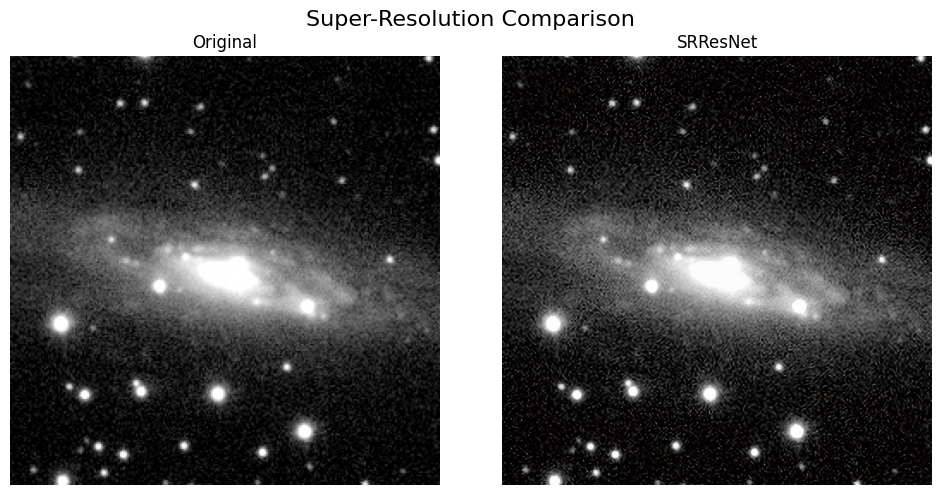

In [6]:
srresnet_checkpoint = "./checkpoints/checkpoint_srresnet_32_.pth.tar"

# Load models
srresnet = torch.load(srresnet_checkpoint)['model'].to(device)
srresnet.eval()

visualize_sr("./test_dataset/pb_250.png", srresnet)

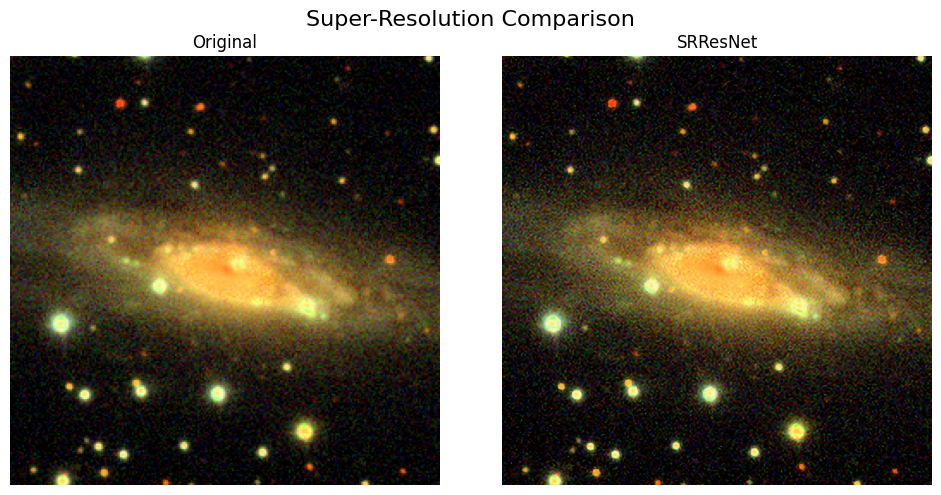

In [7]:
srresnet_checkpoint = "./checkpoints/checkpoint_srresnet_32_.pth.tar"

# Load models
srresnet = torch.load(srresnet_checkpoint)['model'].to(device)
srresnet.eval()

visualize_sr("./test_dataset/__250.png", srresnet)

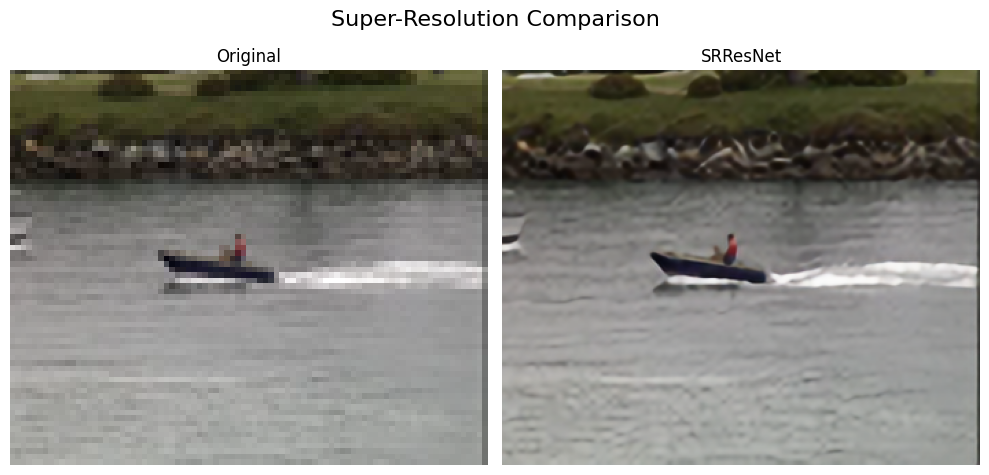

In [10]:
srresnet_checkpoint = "./checkpoints/checkpoint_srresnet_32_.pth.tar"

# Load models
srresnet = torch.load(srresnet_checkpoint)['model'].to(device)
srresnet.eval()

visualize_sr("./test_dataset/coastguard.png", srresnet)

c:\Users\gusta\anaconda3\envs\super\lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


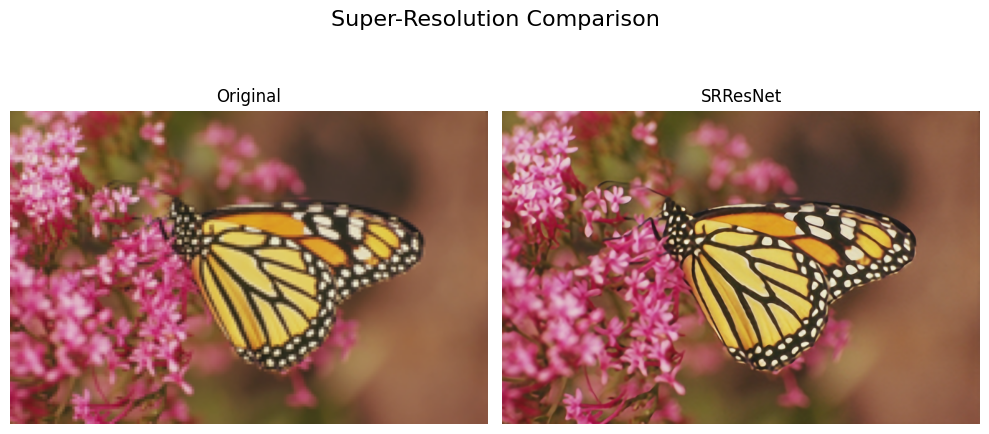

In [11]:
srresnet_checkpoint = "./checkpoints/checkpoint_srresnet_32_.pth.tar"

# Load models
srresnet = torch.load(srresnet_checkpoint)['model'].to(device)
srresnet.eval()

visualize_sr("./test_dataset/monarch.png", srresnet)